In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
#df = pd.read_csv("insurance.csv")
data = pd.read_csv("insurance.csv")
df = pd.DataFrame(data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
df.isnull().sum().sum()

np.int64(0)

In [71]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [72]:
df[['age','bmi','children']].head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [73]:
df['age'].head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

In [74]:
df.iloc[0:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
df = df[['age','bmi','children','charges']]

In [76]:
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [77]:
correlation_matrix = df.corr()

<Figure size 600x400 with 0 Axes>

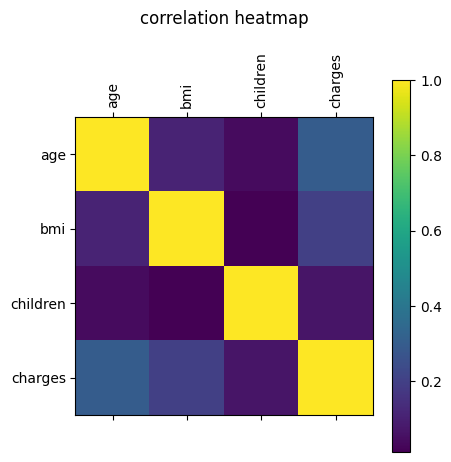

In [78]:
plt.figure(figsize=(6,4))
plt.matshow(correlation_matrix)
plt.colorbar()
plt.title("correlation heatmap",pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

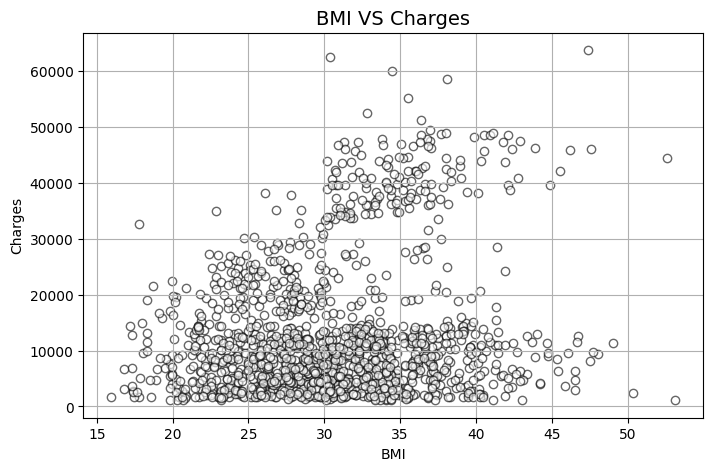

In [79]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['bmi'], df['charges'], alpha=0.6, color='white', edgecolor='black')
plt.title("BMI VS Charges", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

In [80]:
X= df[['age','bmi','children']]
y= df['charges']

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [82]:
scaler= MinMaxScaler()
X_scaled =  scaler.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [84]:
model =  LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred =  model.predict(X_test)

In [86]:
print("Predictions", y_pred[:5])
print('Actual values', y_test.values[:5])

Predictions [13305.28945949 11801.95170145 16941.71437111 14278.42206855
  8680.25439362]
Actual values [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918 ]


In [87]:
mse =  mean_squared_error(y_test, y_pred)
print(mse)

131201335.64669803


In [88]:
rmse =  mse ** 0.5
print(rmse)

11454.315153980095


In [89]:
#Save Model
import pickle
with open('trained_model.pkl','wb') as file:
    pickle.dump(model, file)

In [90]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [91]:
with open('trained_model.pkl', 'rb') as file:
    loaded_model= pickle.load(file)

In [92]:
with open('scaler.pkl', 'rb') as file:
    loaded_scaler= pickle.load(file)

In [93]:
y_pred = loaded_model.predict(X_test)
print(y_pred[:5])

[13305.28945949 11801.95170145 16941.71437111 14278.42206855
  8680.25439362]


In [94]:
custom_data = [13,26.700,10]
custom_data = pd.DataFrame([custom_data], columns=['age', 'bmi', 'children'])
#custom_data = np.array(custom_data).reshape(1,-1)

In [95]:
custom_data_scaled = loaded_scaler.transform(custom_data)
#custom_data_scaled = scaler.fit_transform(custom_data)

In [96]:
y_pred_custom = loaded_model.predict(custom_data_scaled)
print(y_pred_custom)

[11251.80520144]
